In [1]:
import os

import numpy as np 
import pandas as pd
import sympy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import itertools

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import cluster 
from sklearn import metrics

Data Source: https://figshare.com/articles/dataset/Wireless_sensing_dataset_for_human_activity_recognition_HAR_/20444538?file=36582765

This document wrangles the .csv versions of every individual in the **WiFi_CSI/Room_2/[*every position*]** directory.

In [12]:
csv_files = os.listdir('Room2_as_csv')

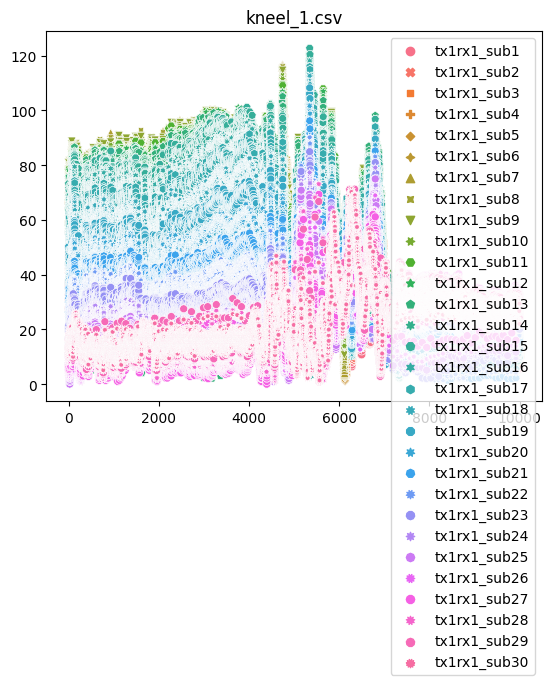

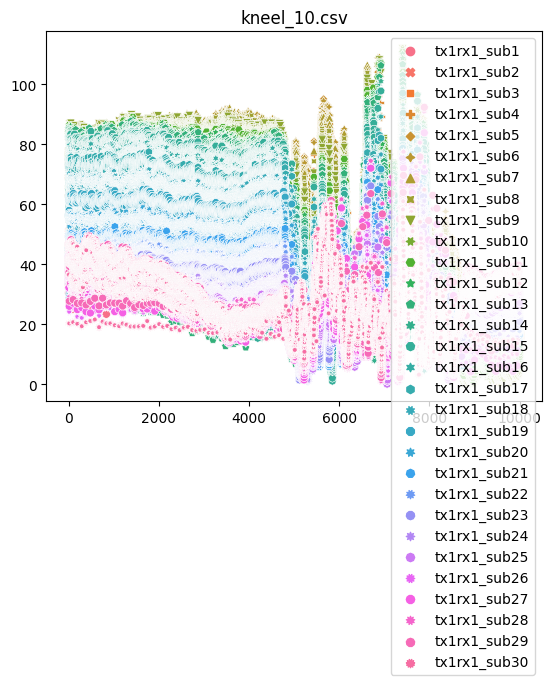

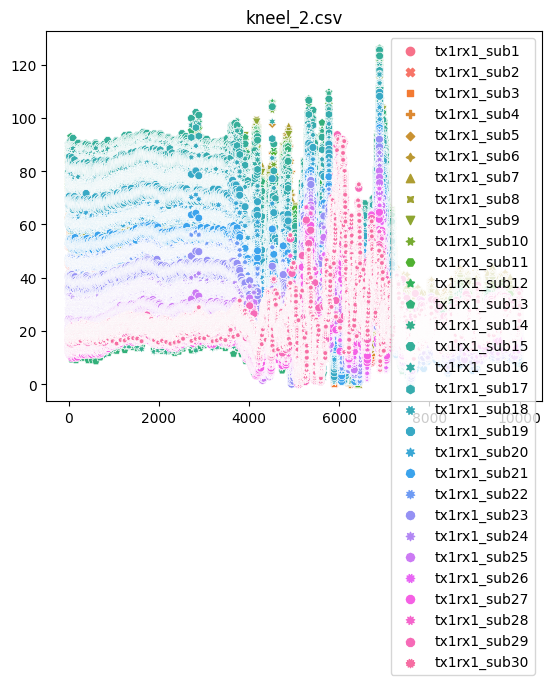

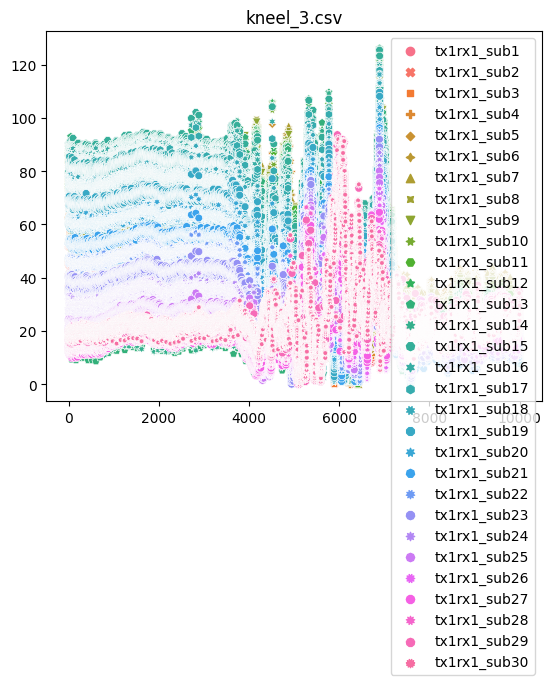

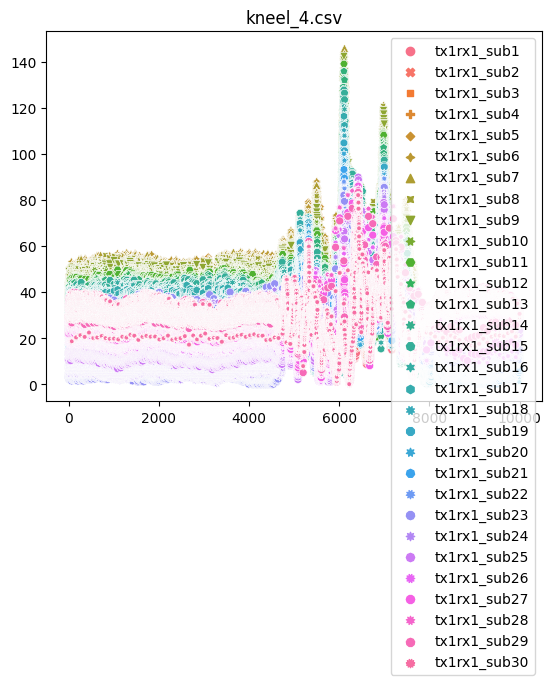

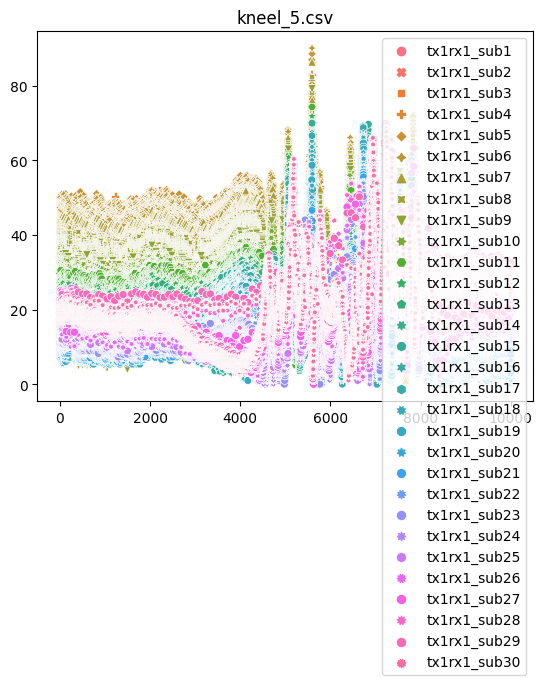

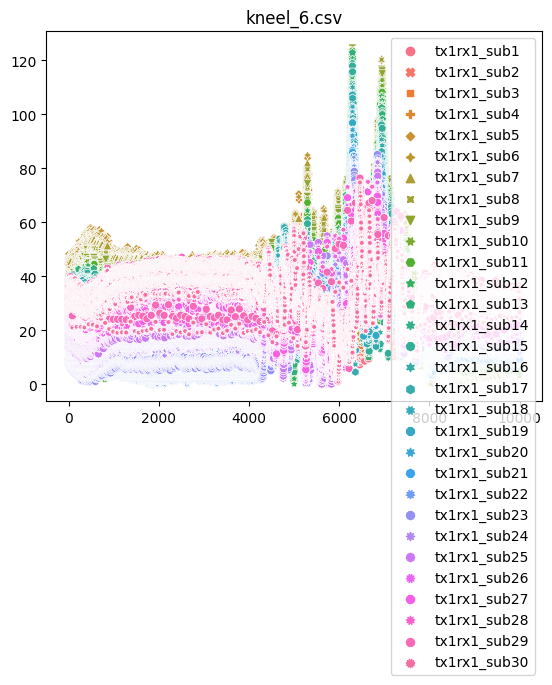

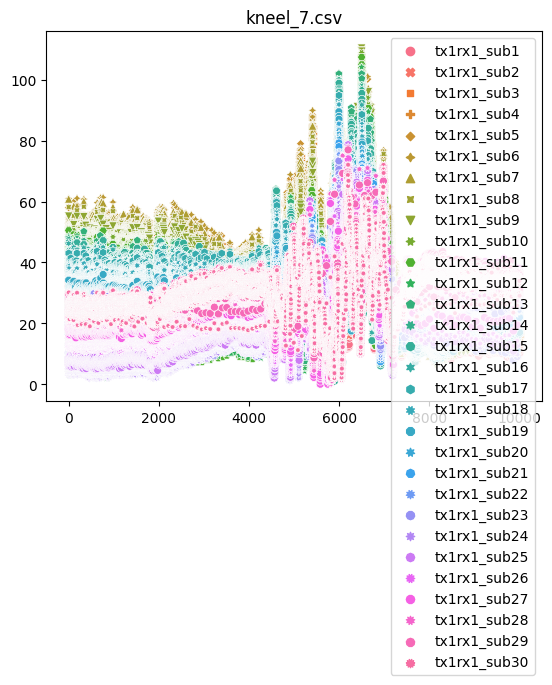

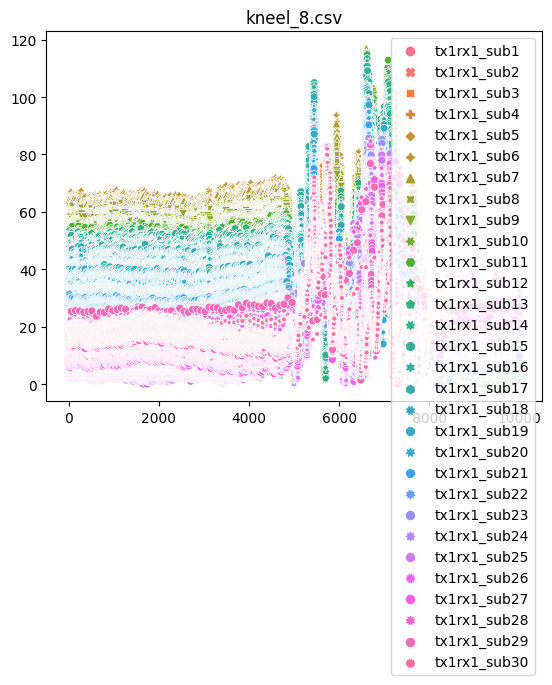

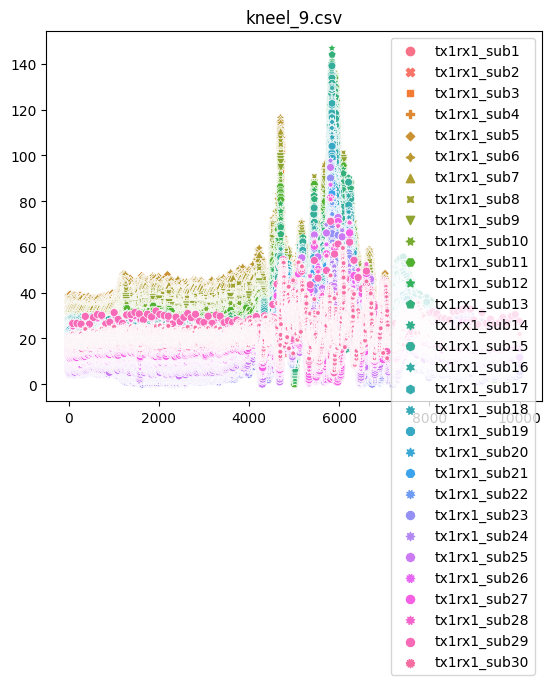

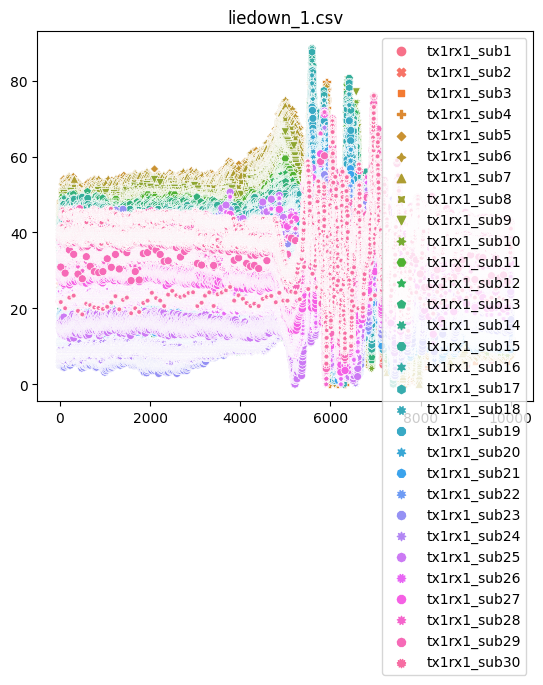

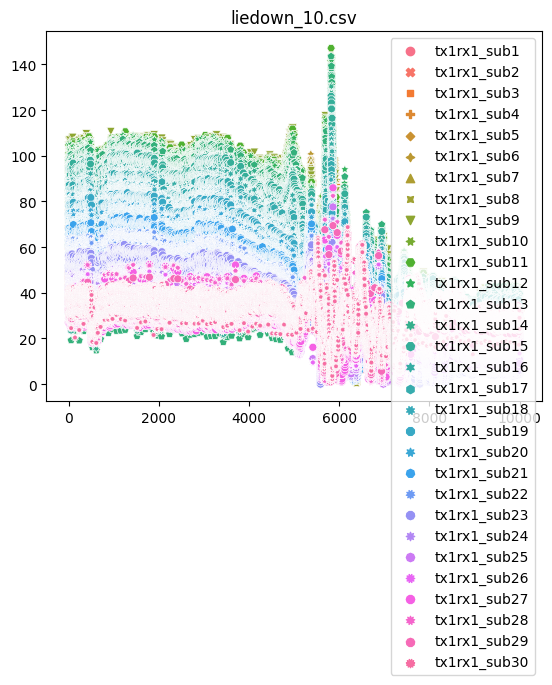

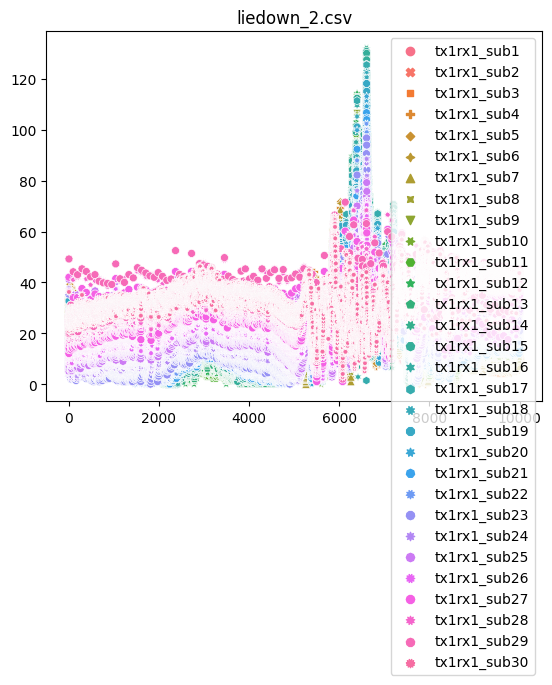

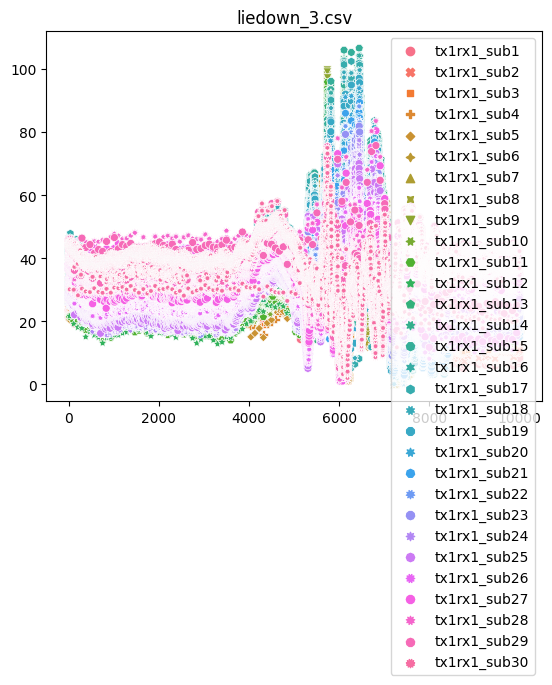

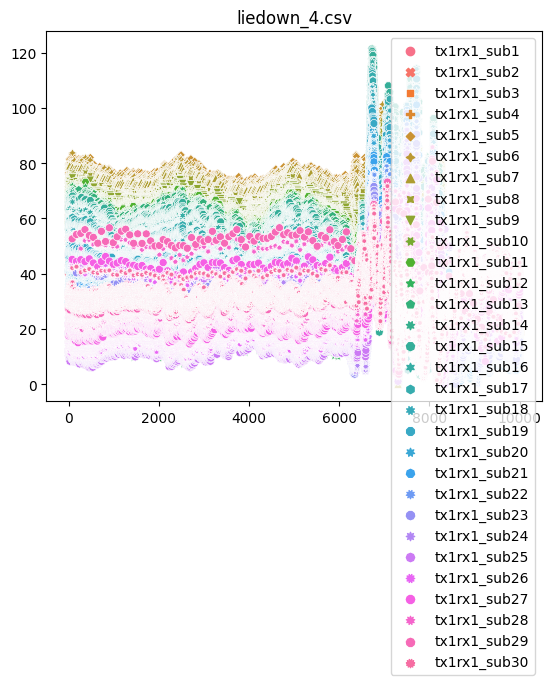

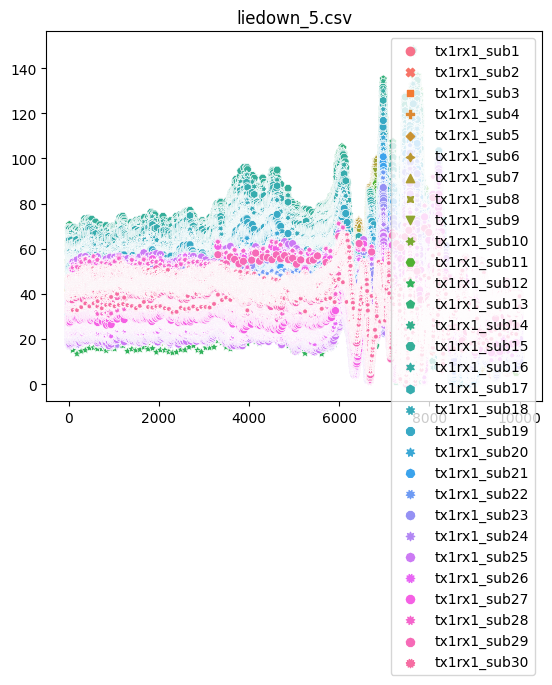

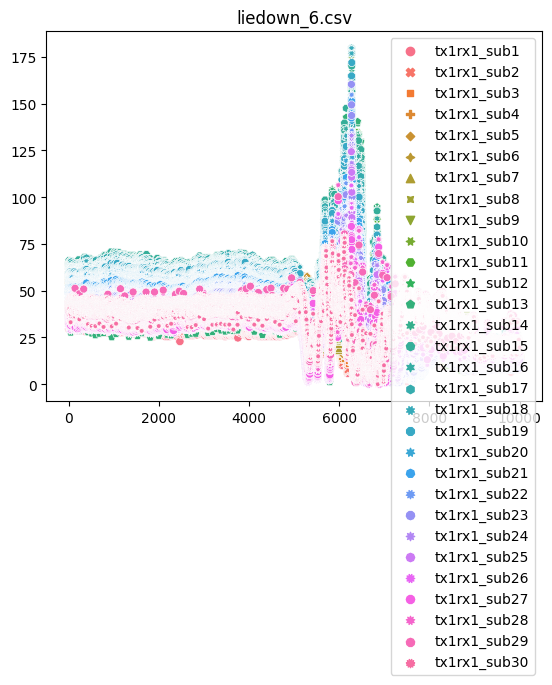

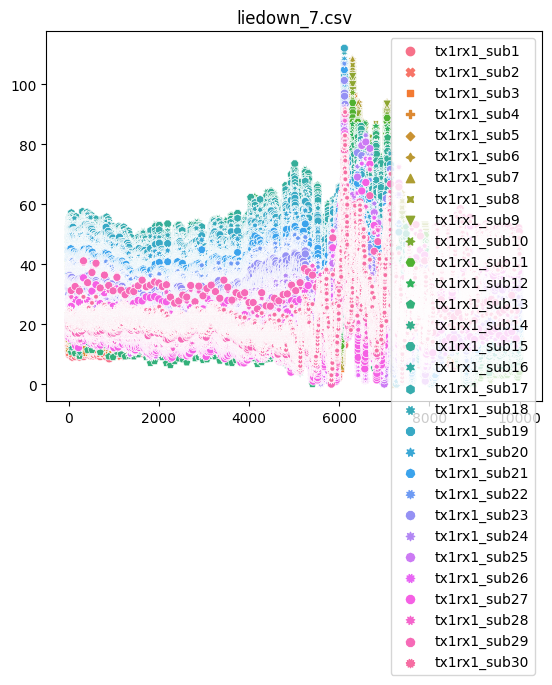

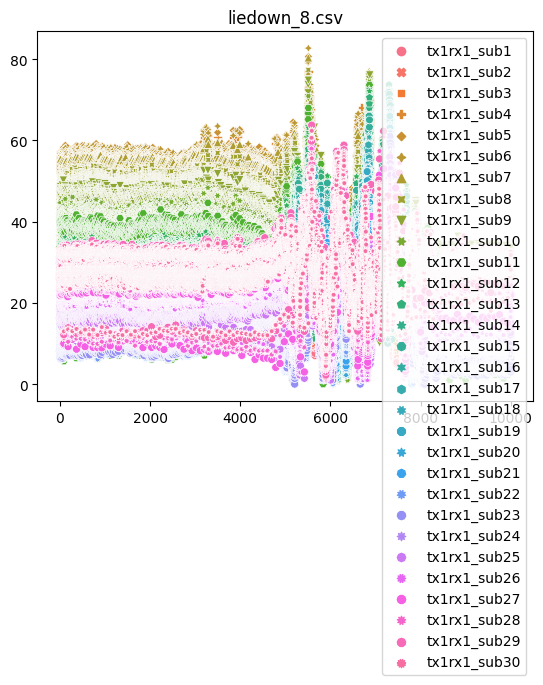

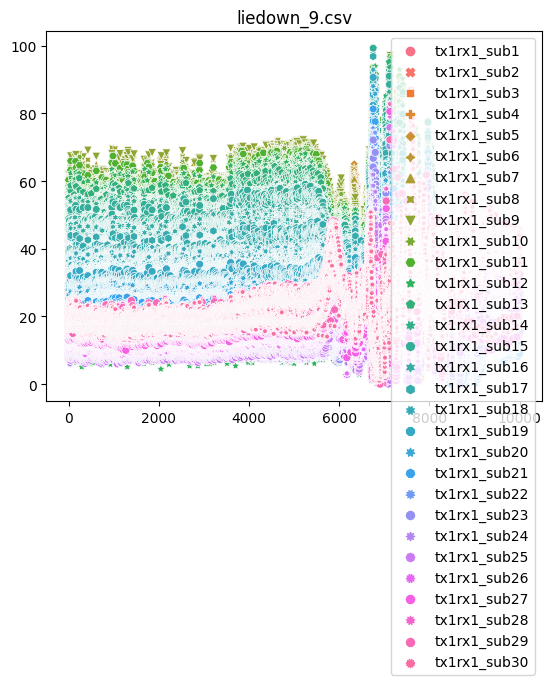

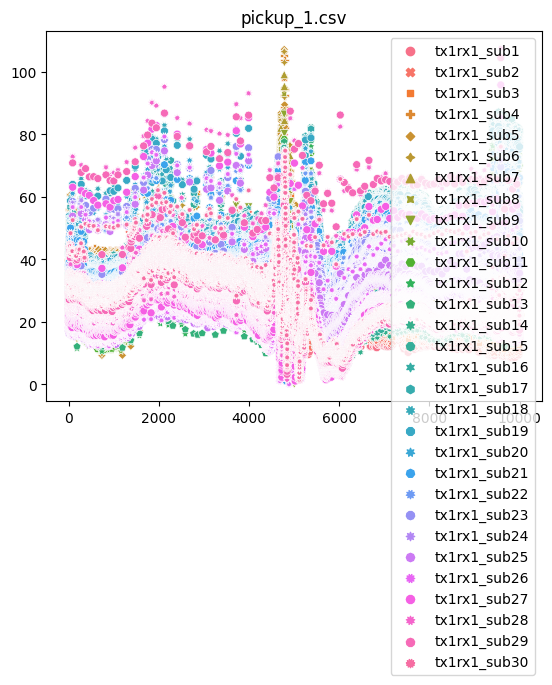

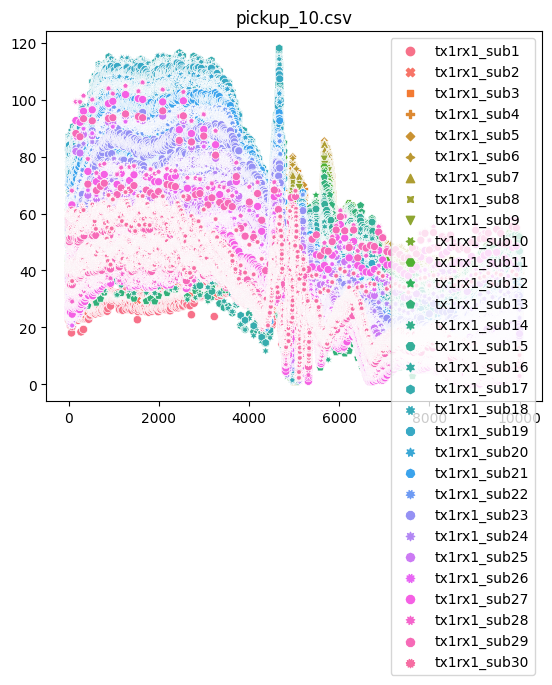

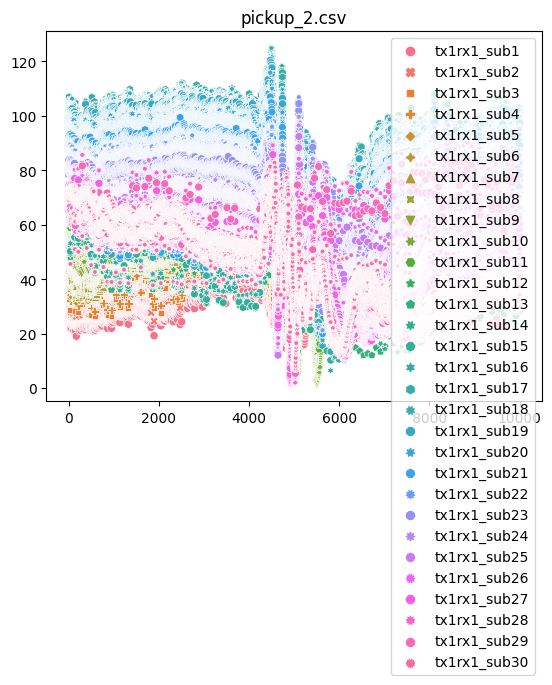

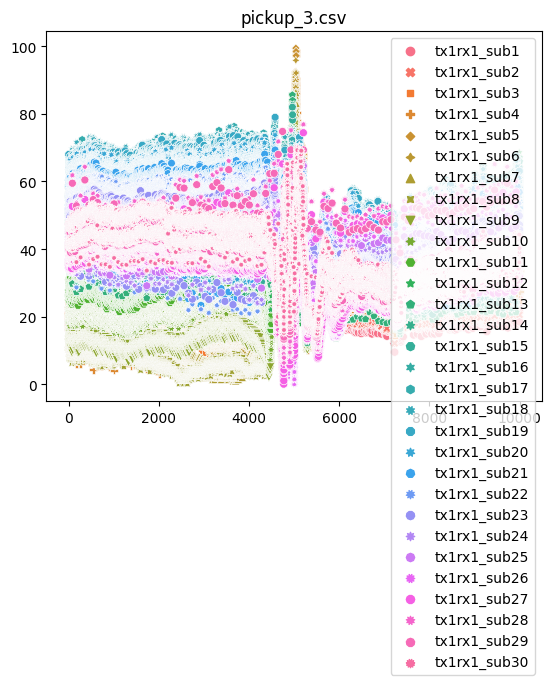

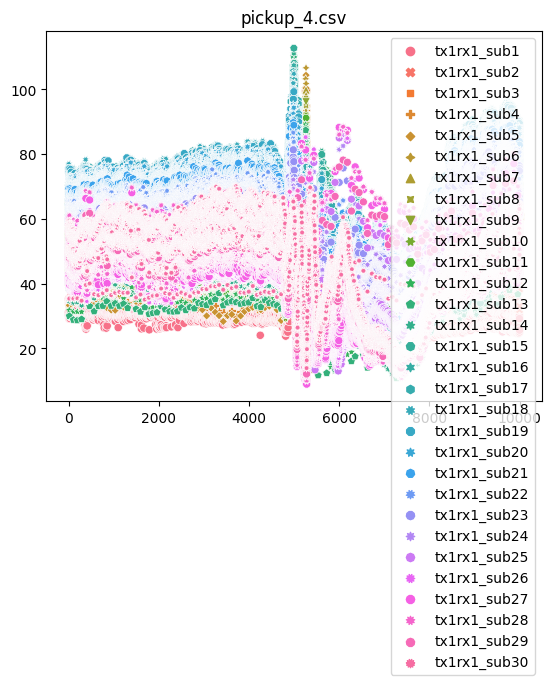

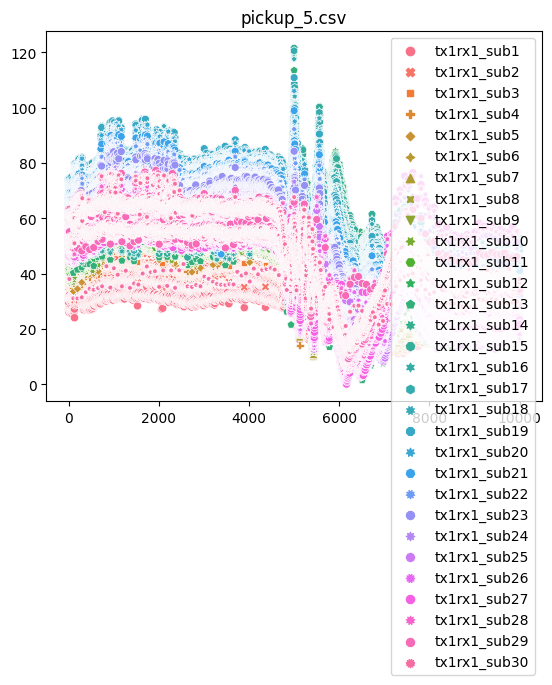

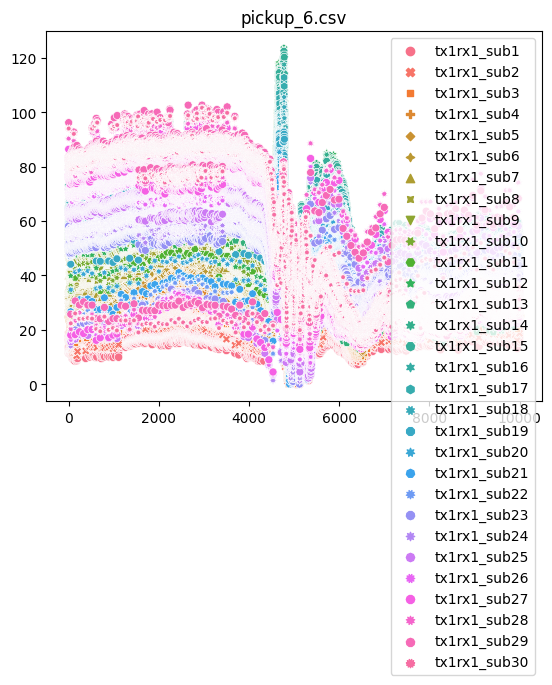

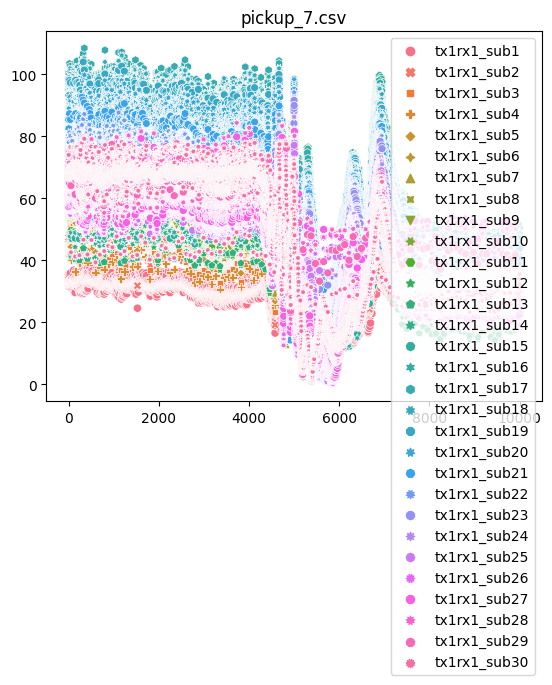

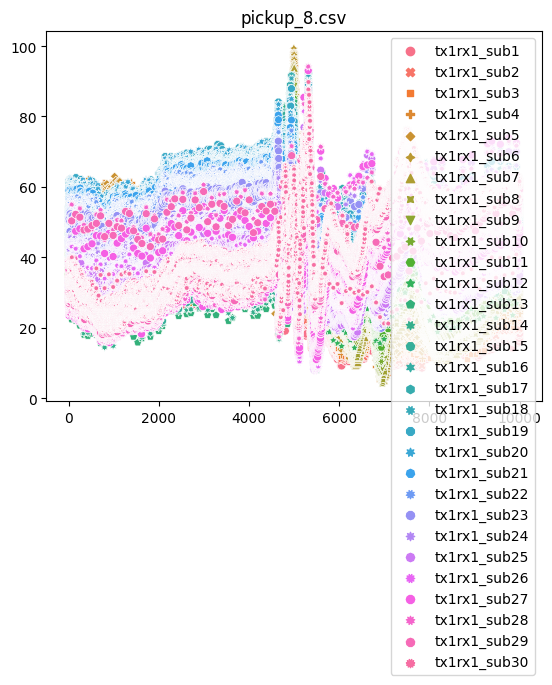

KeyboardInterrupt: 

In [14]:
for csv_file in csv_files:
    df = pd.read_csv(f'Room2_as_csv/{csv_file}')
    for col_name in df.columns:
        df[col_name] = df[col_name].str.replace(' ','')
        df[col_name] = df[col_name].str.replace('i','j')
        df[col_name] = df[col_name].apply(np.complex128)

    df_mag = df.apply(np.abs) # magnitude
    df_ang = df.apply(np.angle) # angle

    sns.scatterplot(df_mag.iloc[:,:30])
    plt.title(csv_file)
    plt.show()

Format of the dataframe:
* The data collection takes place with ONE transmitter (tx) and a receiver with THREE antennas (rx)
* 30 subcarriers (sub) are extracted per transmit receive pair
* The data is collected at 1000 samples per second. Given 10000 rows, each dataframe regards a 10 second period.
* The data is stored as complex channel state information (CSI), for each combination of tx, rx and sub for a given 0.001 second time window.

The complex number in each cell is currently in str. We will clean the string, then let it be a numpy complex dtype.

Next, the data should be made into float types.
* The complex information will be captured via its magitude and phase 

For example, given: 23.0+40.0j 	
* magnitude = sqrt(23^2 + 40^2)
* phase = atan2(40, 23)

In [ ]:
df_mag = df.apply(np.abs) # magnitude
df_ang = df.apply(np.angle) # angle